In [260]:
%cd ..
from mpl_toolkits import mplot3d
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import experimenting.utils.aedat as aedat


ok
[2 2 2 ... 2 2 2]


In [268]:
loaded = aedat.import_aedat({ 'dataTypes':'polarity', 'validOnly':True, 'filePathAndName': "/data/rslsync/Resilio Sync/DHP19/DVS_movies/S16/session2/mov1.aedat"})
events = loaded['data']['polarity']

ok
[2 2 2 ... 2 2 2]


In [286]:
# Data for a three-dimensional line
Z_e = events['timeStamp']
X_e = events['x']
Y_e = events['y']
cams_e = events['cam']
p_e = events['polarity'] > 0

start_event = 0
end_event = start_event +  1000000
cam = 3

In [287]:
X = X_e[cams_e == cam][start_event:end_event]
Y = Y_e[cams_e == cam][start_event:end_event]
Z = Z_e[cams_e == cam][start_event:end_event]
P = p_e[cams_e == cam][start_event:end_event]

In [439]:
import cv2

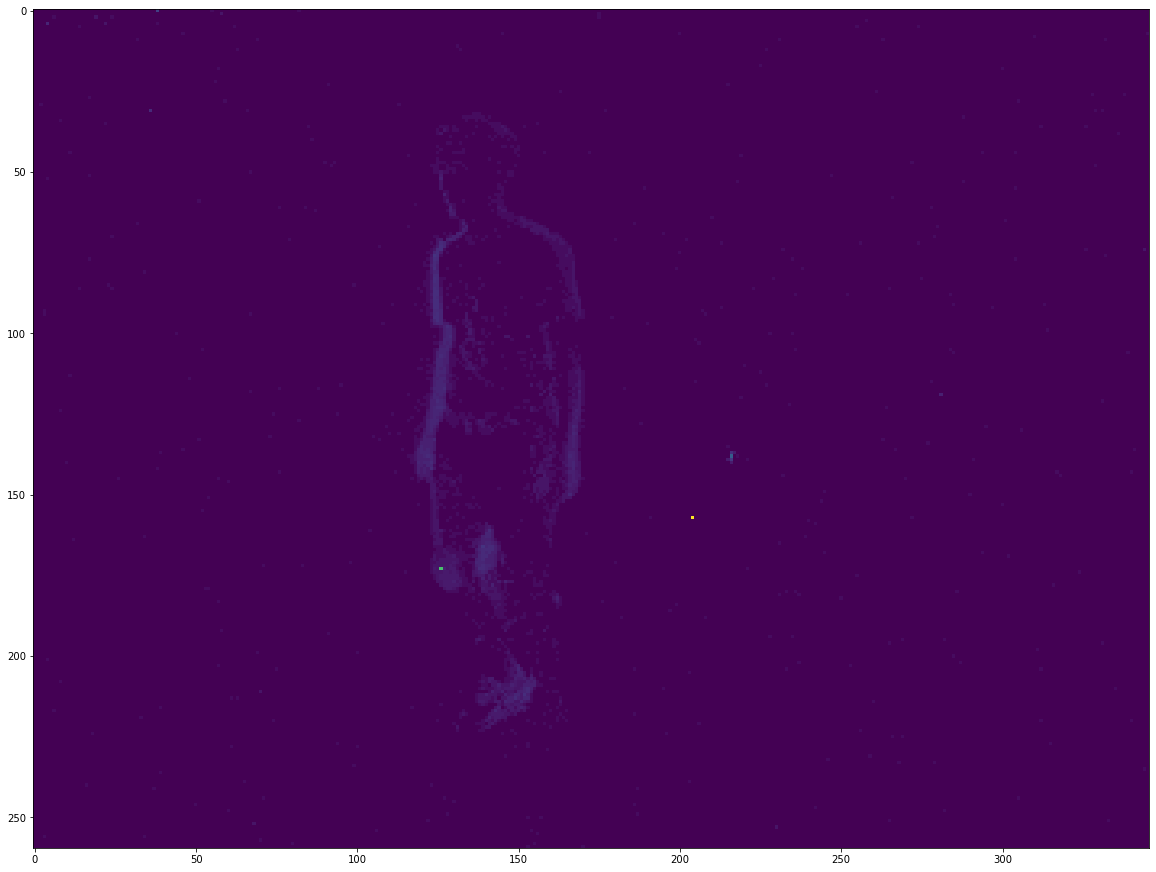

In [451]:
count = 0
frame = np.zeros((346, 260))
i = start_event + 7500 * 35
end_event = i + 7600
while i < end_event:
    count +=1
    x = X[i]
    y = Y[i]
    frame[x, y] += 1
    i+=1
    if count > 7500:
        frame = cv2.rotate(normalize(frame).swapaxes(1,0), cv2.ROTATE_180)
        plt.figure(figsize=(20, 20))
        plt.imshow(frame ** .7)
        count=0

In [446]:
def normalize(frame):
    rows, cols = frame.shape
    sum_img = frame.sum()
    count_img = (frame>0).sum()
    mean_img = sum_img / count_img
    sig_img = frame[frame>0].std()
    num = 3.0
    r = num * sig_img
    halfrange = 0
    rangenew = 255
    meanGrey = 0

    frame[frame != 0] = (frame[frame != 0]*255/r)
    frame[frame>rangenew] = 255
    frame = frame.astype(float) / 255.
    return frame

In [372]:
p 

array([False, False, False, ...,  True, False, False])

Text(0.5, 0, 't (ms)')

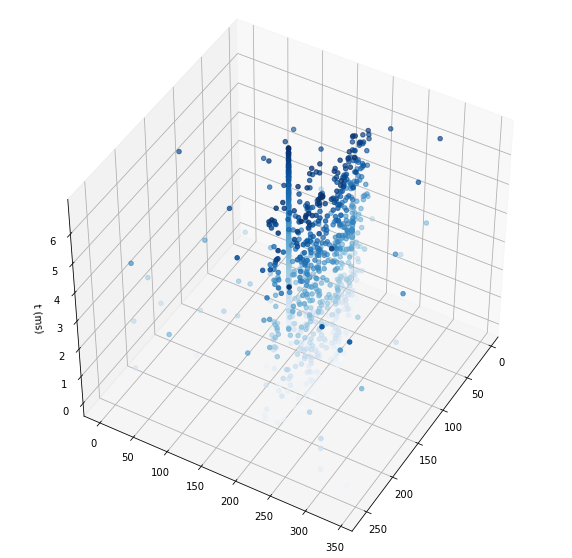

In [434]:
n_events = 35 * 7500
delta_t = 10000
max_n = 7500
step = 7

slice_object = slice(n_events, n_events+max_n, step)


p = (P[slice_object]).astype(int)+1
x = X[slice_object] 
y = Y[slice_object] 
z = Z[slice_object] / delta_t - 263

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.view_init(45, 30)
ax.scatter3D(y, x, z,c=z, cmap='Blues')
ax.set_zlabel('t (ms)')

In [ ]:
frame = np.zeros((max(x), max(y)))
for x, y in zip(X, Y):
    frame[x-1, y-1] += 1

In [ ]:
(frame > 0).sum()

In [ ]:
plt.imshow(frame)

In [ ]:
mesh = np.zeros((len(X_n), len(Y_n)))
for i in range(len(X_n)):
    mesh[i] = frame[X_n[i]-1, Y_n[i]-1]

In [ ]:
def get_mesh(X, Y):
    mesh = np.zeros((len(X), len(Y)))
    return mesh
    
        

In [ ]:
X_n, Y_n = np.meshgrid(X, Y)
mesh = get_mesh(X_n, Y_n)

In [ ]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 35)
ax.contour3D(X_n, Y_n, mesh, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('time');

